# Numerical solution to the projectile launch problem
This code ilustrates two-dimensional particle kinematics by studying classical projectile launch.

By:
**Juan A. Ramírez Macías**  
*Mech. Eng. Professor*  
*Universidad Pontificia Bolivariana*


## Projectile model
The model assumes a projectile that is launched from a foreknown initial velocity $\vec{v}_0$ at time $t = 0$. The idea is to compute the curves for position and velocity as functions of time.

![Projectile](./img/projectileLaunchDrag.png)

### Reference frame
In this problem the reference frame is chosen with $x$-coordinate positive right and $y$-coordinate positive up.

### Newtonian model of the projectile without drag
The classical model for projectile launch comes from Newtonian mechanics, where Newton's second law is given by
$$\vec{F} = m \vec{a}.$$
If the only force is weight, given by $\vec{W} = \left[\begin{array}{c} 0 \\ -mg \end{array}\right]$, the dynamic model becomes $\vec{W} = m \vec{a}$. Explicitly, this is
$$\left[\begin{array}{c} 0 \\ -mg \end{array}\right] = m \left[\begin{array}{c} a_x \\ a_y \end{array}\right].$$
If we write the model component-wise, we get
$$a_y = - g$$
and
$$a_x = 0.$$

### Newtonian model of the projectile with drag
In this case the forces are weight and drag. As before, the weight is given by $\vec{W} = \left[\begin{array}{c} 0 \\ -mg \end{array}\right]$.

On the other side, the magnitude of drag is given by $F_A = \frac{1}{2} \rho A C_D v^2.$ 

We write the drag force vector as
$$\vec{F}_A = \left[\begin{array}{c} -\frac{1}{2} \rho A C_D v_x |v_x| \\ -\frac{1}{2} \rho A C_D v_y |v_y| \end{array}\right]$$.

Then, the dynamic model becomes $\vec{W} + \vec{F}_A = m \vec{a}$.

Explicitly, this is
$$\left[\begin{array}{c} 0 \\ -mg \end{array}\right] + \left[\begin{array}{c} -\frac{1}{2} \rho A C_D v_x |v_x| \\ -\frac{1}{2} \rho A C_D v_y |v_y| \end{array}\right] = \left[\begin{array}{c} -\frac{1}{2} \rho A C_D v_x |v_x| \\ -\frac{1}{2} \rho A C_D v_y |v_y| \end{array}\right]= m \left[\begin{array}{c} a_x \\ a_y \end{array}\right].$$

If we write the model component-wise and obtain accelerations, we get

$$a_x = -\frac{1}{2} \frac{\rho A C_D}{m} v_x |v_x| $$
and
$$a_y = - g - \frac{1}{2} \frac{\rho A C_D}{m}  v_y |v_y|$$

### Discrete solution
The discrete solution is based on the difference equations
- For velocity we use an Euler algorithm: $v_{k+1} = v_{k} + h a_k $
- For position we use a trapezoidal rule: $x_{k+1} = x_{k} + \frac{h}{2} \left(v_k + v_{k+1} \right)$

## Import required Python modules

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Launch conditions
Launch conditions are given by initial position and velocity

In [2]:
# Initial condition at t = 0
# Position
x0 = 0.0
y0 = 0.0

# Velocity
v0 = 10.0
# Angle
theta = np.pi / 4. # rad

# Final time
tf = 1.1 # s
# Time-step
h = 0.01 # s

# Gravity
g = 9.8

# Drag-related parameters
# Density
rho = 1.225 # kg/m^3
# Mass
m = 2.8e-3 # kg
# Diameter
d = 40.e-3 # m
# Projected area
A = np.pi * d ** 2 / 4. # m^2
# Drag coefficient
Cd = 0.47 # non-dimensional
# Drag constant
Ka = 0.5 * rho * A * Cd / m # 

## Computation of the trajectory and velocity in the no-drag condition
To plot trajectory and velocity in the case without drag, the solution is:
### Position
$x$-direction:
$$x(t) = x_0 + v_0 \cos(\theta) t.$$
$y$-direction:
$$y(t) = y_0 + v_0 \sin(\theta) t - \frac{1}{2} g t ^ 2.$$
### Velocity
$x$-direction:
$$v_x (t)= v_0 \cos(\theta).$$
$y$-direction:
$$v_y (t) = v_0 \sin(\theta) - g t.$$

In [3]:
# Time in seconds
t = np.arange(0., tf + h, h)
# Position in meters
x = x0 + v0 * np.cos(theta) * t
y = y0 + v0 * np.sin(theta) * t - 0.5 * g * t ** 2 
# Velocity in m/s
Vx = v0 * np.cos(theta) * np.ones_like(t)
Vy = v0 * np.sin(theta) - g * t

## Discrete solution of the problem with drag
The algorithm to compute velocity and position at instant $k+1$ from velocity and position at instant $k$ is:

Acceleration:
- $a_{x_k} = - k_A v_{x_k} \left| v_{x_k} \right|$
- $a_{y_k} = - g - k_A v_{y_k} \left| v_{y_k} \right|$
    
Velocity:
- $v_{x_{k+1}} = v_{x_k} + h a_{x_k}$
- $v_{y_{k+1}} = v_{y_k} + h a_{y_k}$
    
Position:
- $x_{k+1} = x_k + \frac{h}{2} \left(v_{x_k} + v_{x_{k+1}} \right)$
- $y_{k+1} = y_k + \frac{h}{2} \left(v_{y_k} + v_{y_{k+1}} \right)$

In [4]:
# Sample time
h = 0.01 # s

# Time array
t_k = np.arange(0., tf + h, h)

# Empty arrays
# Velocity
Vx_k = np.zeros_like(t_k)
Vy_k = np.zeros_like(t_k)
# Position
x_k = np.zeros_like(t_k)
y_k = np.zeros_like(t_k)

# Initial velocity
Vx_k[0] = v0 * np.cos(theta)
Vy_k[0] = v0 * np.sin(theta)
# Initial position
x_k[0] = x0
y_k[0] = y0

# Loop to compute the discrete problem
for k in range(len(t_k) - 1):
    # Acceleration
    ax = - Ka * Vx_k[k] * np.abs(Vx_k[k])
    ay = - g - Ka * Vy_k[k] * np.abs(Vy_k[k])
    
    # Velocity
    Vx_k[k+1] = Vx_k[k] + h * ax
    Vy_k[k+1] = Vy_k[k] + h * ay
    
    # Position
    x_k[k+1] = x_k[k] + h * 0.5 * (Vx_k[k] + Vx_k[k+1]) 
    y_k[k+1] = y_k[k] + h * 0.5 * (Vy_k[k] + Vy_k[k+1])

## Plot of the trajectory
Here, we plot $y$ vs $x$. Then, we plot the velocity vector $\vec{v}$ on different points.

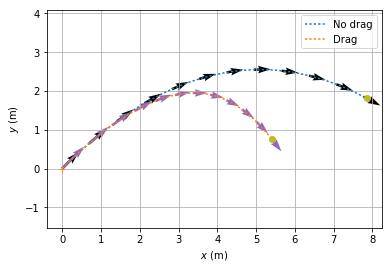

In [5]:
plt.figure()
# Trajectories plot
# Projectile (ideal) model
plt.plot(x, y, ':')
# Projectile with drag
plt.plot(x_k, y_k, ':C1')
plt.legend(['No drag', 'Drag'])

# Initial point
plt.plot(x[0], y[0], '+')
# Final point
plt.plot(x[-1], y[-1], 'oC8')
plt.plot(x_k[-1], y_k[-1], 'oC8')

# Velocity field plot
# Projectile (ideal) model
plt.quiver(x[::10], y[::10], Vx[::10], Vy[::10])
# Projectile with drag
plt.quiver(x_k[::10], y_k[::10], Vx_k[::10], Vy_k[::10], color = 'C4')

# Axes settings
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.axis('equal')
plt.grid()
plt.show()

## Time plots
Here we plot the different variables as a function of time:
- $x$ vs $t$ and $y$ vs $t$
- $v_x$ vs $t$ and $v_y$ vs $t$

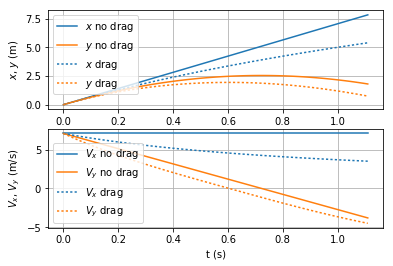

In [6]:
plt.figure()

# Position
plt.subplot(211)
plt.plot(t, x)
plt.plot(t, y)
plt.plot(t_k, x_k, ':C0')
plt.plot(t_k, y_k, ':C1')
plt.ylabel('$x$, $y$ (m)')
plt.legend(['$x$ no drag', '$y$ no drag', '$x$ drag', '$y$ drag'])
plt.grid()

# Velocity
plt.subplot(212)
plt.plot(t, Vx)
plt.plot(t, Vy)
plt.plot(t_k, Vx_k, ':C0')
plt.plot(t_k, Vy_k, ':C1')
plt.xlabel('t (s)')
plt.ylabel('$V_x$, $V_y$ (m/s)')
plt.legend(['$V_x$ no drag', '$V_y$ no drag', '$V_x$ drag', '$V_y$ drag'])
plt.grid()
plt.show()